In [1]:
#
# Julia version of code adapted from
# https://github.com/rawlings-group/paresto/blob/master/examples/green_book/bvsm.m
#

In [2]:
using CSV, DataFrames
using DifferentialEquations, DiffEqSensitivity
using Plots
using Optim
using FiniteDiff, ForwardDiff, FiniteDifferences
using Interpolations

In [3]:
Qf_data = CSV.read("data_sets/flow.dat", DataFrame, header = ["Col"])

,Col
,String
1,9.000000 9.7817838E-02 4.786000
2,19.00000 1.290601 14.21800
3,29.00000 1.262779 13.99800
4,39.00000 1.240016 13.81800
5,49.00000 1.215736 13.62600
6,59.00000 1.187156 13.40000
7,69.00000 1.160599 13.19000
8,79.00000 0.5545961 8.398001
9,89.00000 1.109508 12.78600


In [4]:
strsplit(x) = [parse(Float64, y) for y in split(strip(x),r"\s+")]

strsplit (generic function with 1 method)

In [5]:
Qf_data_v = strsplit.(Qf_data.Col)

87-element Vector{Vector{Float64}}:
 [9.0, 0.097817838, 4.786]
 [19.0, 1.290601, 14.218]
 [29.0, 1.262779, 13.998]
 [39.0, 1.240016, 13.818]
 [49.0, 1.215736, 13.626]
 [59.0, 1.187156, 13.4]
 [69.0, 1.160599, 13.19]
 [79.0, 0.5545961, 8.398001]
 [89.0, 1.109508, 12.786]
 [99.0, 1.361925, 14.782]
 [109.0, 1.332333, 14.548]
 [119.0, 1.294648, 14.25]
 [129.0, 1.271885, 14.07]
 ⋮
 [759.0, 0.1059619, 4.8504]
 [769.0, 0.00067019463, 4.0178]
 [779.0, 0.068099439, 4.551]
 [789.0, 0.000872612, 4.0194]
 [799.0, 0.00097372534, 4.0202]
 [809.0, 0.00087256433, 4.0194]
 [819.0, 0.00079669955, 4.0188]
 [829.0, 0.00072083471, 4.0182]
 [839.0, 0.00056912901, 4.017]
 [849.0, 0.00046801567, 4.0162]
 [859.0, 0.00051856041, 4.0166]
 [869.0, 0.00044267176, 4.016]

In [6]:
tQf = append!([0.0], [x[1] for x in Qf_data_v])
Qf = append!([0.0], [x[2] for x in Qf_data_v]./0.728)

88-element Vector{Float64}:
 0.0
 0.1343651620879121
 1.7728035714285717
 1.7345865384615387
 1.7033186813186814
 1.6699670329670329
 1.6307087912087914
 1.5942293956043956
 0.7618078296703298
 1.5240494505494504
 1.870776098901099
 1.8301277472527473
 1.7783626373626373
 ⋮
 0.14555206043956043
 0.0009205970192307693
 0.09354318543956044
 0.0011986428571428573
 0.0013375348076923078
 0.0011985773763736264
 0.0010943675137362638
 0.0009901575686813188
 0.0007817706181318682
 0.0006428786675824176
 0.0007123082554945056
 0.0006080656043956044

In [7]:
Qf_itl = ConstantInterpolation(tQf, Qf)

88-element extrapolate(interpolate((::Vector{Float64},), ::Vector{Float64}, Gridded(Constant{Nearest}())), Throw()) with element type Float64:
 0.0
 0.1343651620879121
 1.7728035714285717
 1.7345865384615387
 1.7033186813186814
 1.6699670329670329
 1.6307087912087914
 1.5942293956043956
 0.7618078296703298
 1.5240494505494504
 1.870776098901099
 1.8301277472527473
 1.7783626373626373
 ⋮
 0.14555206043956043
 0.0009205970192307693
 0.09354318543956044
 0.0011986428571428573
 0.0013375348076923078
 0.0011985773763736264
 0.0010943675137362638
 0.0009901575686813188
 0.0007817706181318682
 0.0006428786675824176
 0.0007123082554945056
 0.0006080656043956044

In [8]:
tQf_i = 0:1:maximum(tQf)
Qf_i = Qf_itl.(tQf_i)

870-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 0.1343651620879121
 ⋮
 0.0007123082554945056
 0.0007123082554945056
 0.0007123082554945056
 0.0007123082554945056
 0.0007123082554945056
 0.0007123082554945056
 0.0006080656043956044
 0.0006080656043956044
 0.0006080656043956044
 0.0006080656043956044
 0.0006080656043956044
 0.0006080656043956044

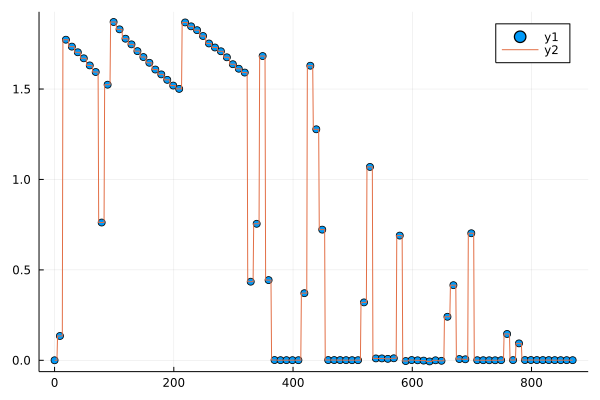

In [9]:
plot(tQf, Qf, seriestype = :scatter)
plot!(tQf_i, Qf_i)

In [10]:
lc_data = CSV.read("data_sets/lc.dat", DataFrame, delim = "\t", header = ["Col"])

,Col
,String31
1,414 0.17050
2,424 0.16040
3,434 0.13250
4,444 0.10840
5,493 0.10140
6,503 0.10420
7,513 0.10450
8,523 0.09700
9,533 0.08240


In [11]:
lc_data_v = strsplit.(lc_data.Col)
tlc = [x[1] for x in lc_data_v]
lc = [x[2] for x in lc_data_v]

35-element Vector{Float64}:
 0.1705
 0.1604
 0.1325
 0.1084
 0.1014
 0.1042
 0.1045
 0.097
 0.0824
 0.0678
 0.0697
 0.0702
 0.0692
 ⋮
 0.0449
 0.0456
 0.045
 0.0434
 0.0428
 0.0426
 0.0409
 0.0399
 0.0397
 0.0394
 0.0374
 0.0371

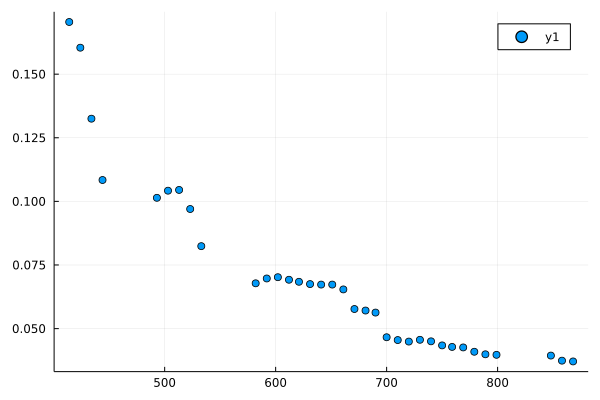

In [12]:
plot(tlc, lc, seriestype = :scatter)

In [13]:
function rates(u, p, t)
    
    cBf = 0.00721

    vR = u[1]
    nA = u[2]
    nB = u[3]
    nC = u[4]
    nD = u[5]
    
    Qf_itl = p[1]
    k1 = p[2]
    k2 = p[3]
    
    dvR = Qf_itl(t)
    dnA = -k1 * nA * nB / vR
    dnB = Qf_itl(t) * cBf - nB * (k1 * nA + k2 * nC) / vR
    dnC = nB * (k1 * nA - k2 * nC) / vR
    dnD = k2 * nB * nC / vR
    
    return [dvR, dnA, dnB, dnC, dnD]

end

rates (generic function with 1 method)

In [14]:
u0 = [2300.0, 2.35, 0.0, 0.0, 0.0]
p = [Qf_itl, 853.0, 462.0]
tspan = (0.0, 850.0)
prob = ODEProblem(rates, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 850.0)
u0: 5-element Vector{Float64}:
 2300.0
    2.35
    0.0
    0.0
    0.0

In [15]:
sol = solve(prob, Rosenbrock23());

In [16]:
y = [x[4]/(x[4] + 2.0 * x[5] + 1.0e-6) for x in sol.u]

536-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.04004685122974962
 ⋮
 0.04193674119990402
 0.041824929532688876
 0.04165934893922441
 0.04141739733456149
 0.04113925514901755
 0.04087848530394082
 0.040526612391329424
 0.04021721455179075
 0.03993786607417146
 0.039723313106441
 0.0395504432114515
 0.03943941510676778

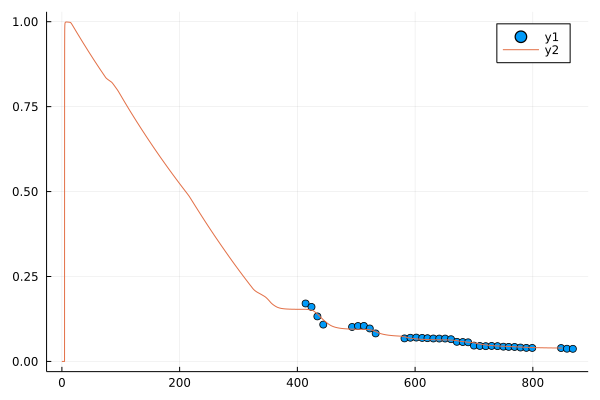

In [17]:
plot(tlc, lc, seriestype = :scatter)
plot!(sol.t, y)

In [ ]:
ypred = [sol(t)[4]/(sol(t)[4] + 2.0 * sol(t)[5] + 1.0e-6) for t in tlc]

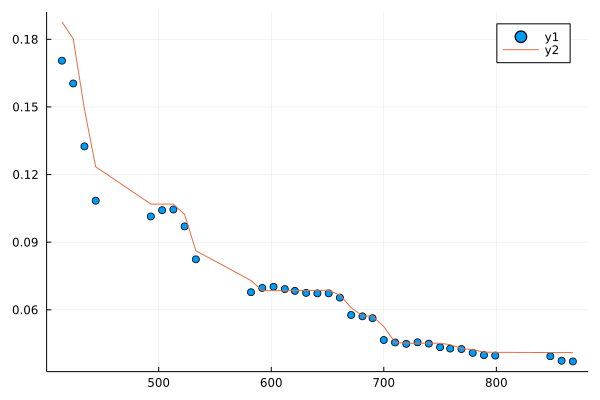

In [30]:
plot(tlc, lc, seriestype = :scatter)
plot!(tlc, ypred)

In [18]:
function calc_SSE(pest, data, Qf_itl)

    _prob = remake(prob, p = [Qf_itl, pest[1] * 1.0e3, pest[2] * 1.0e3])
    sol = solve(_prob, Rosenbrock23())
    ypred = [sol(t)[4]/(sol(t)[4] + 2.0 * sol(t)[5] + 1.0e-6) for t in data.tlc]
    sse = 0.0
    for (i, t) in enumerate(data.tlc)
        sse = sse + (data.lc[i]/ypred[i] - 1.0)^2
    end
    return sse * 100
end

calc_SSE (generic function with 1 method)

In [21]:
pest = [2.0, 1.0]
data = copy(lc_data)
_prob = remake(prob, p = [Qf_itl, pest[1] * 1.0e3, pest[2] * 1.0e3])
sol = solve(_prob, Rosenbrock23())
ypred = [sol(t)[4]/(sol(t)[4] + 2.0 * sol(t)[5] + 1.0e-6) for t in data.tlc]
sse = 0.0
for (i, t) in enumerate(data.tlc)
    sse = sse + (data.lc[i]/ypred[i] - 1.0)^2
end
sse * 100

9.122416386272887

In [20]:
lc_data = DataFrame(tlc = tlc, lc = lc)

,tlc,lc
,Float64,Float64
1,414.0,0.1705
2,424.0,0.1604
3,434.0,0.1325
4,444.0,0.1084
5,493.0,0.1014
6,503.0,0.1042
7,513.0,0.1045
8,523.0,0.097
9,533.0,0.0824


In [36]:
calc_SSE([50000.0, 5000.0], lc_data, Qf_itl)

0.10455227205669977

In [ ]:
res_pe = optimize(p -> calc_SSE(p, lc_data, Qf_itl), [1000.0, 1000.0], BFGS())

In [ ]:
res_pe.minimizer

In [ ]:
H_ad = ForwardDiff.hessian(p -> calc_SSE(p, lc_data, Qf_itl), [2000.0, 1000.0])

In [37]:
calc_SSE_a(p) = calc_SSE(p, lc_data, Qf_itl)

calc_SSE_a (generic function with 1 method)

In [22]:
H = FiniteDiff.finite_difference_hessian(p -> calc_SSE(p, lc_data, Qf_itl), [2.0, 1.0])

2×2 LinearAlgebra.Symmetric{Float64, Matrix{Float64}}:
 -3.00734e6  -5.74881e5
 -5.74881e5  -1.27964e7

In [46]:
inv(H)

2×2 LinearAlgebra.Symmetric{Float64, Matrix{Float64}}:
 5044.0     -78.0986
  -78.0986  -18.8281

In [ ]:
n = size(lc_data)[1]
p = 2
mse = calc_SSE(res_pe.minimizer, lc_data, Qf_itl)/(n - p)

In [ ]:
cov_est = 2 * mse * inv(H)

In [ ]:
g = FiniteDiff.finite_difference_gradient(p -> calc_SSE(p, lc_data, Qf_itl), res_pe.minimizer)

In [ ]:
calc_SSE(res_pe.minimizer, lc_data, Qf_itl)

In [ ]:
x = copy(res_pe.minimizer)
x_pert_1 = [x[1]*1.05, x[2]]
x_pert_2 = [x[1]*0.95, x[2]]
pert = 0.05*x[1]
(calc_SSE(x_pert_1, lc_data, Qf_itl) - 2 * calc_SSE(x, lc_data, Qf_itl) + calc_SSE(x_pert_2, lc_data, Qf_itl))/pert^2

In [ ]:
x = copy(res_pe.minimizer)
x_pert_1 = [x[1], x[2]*1.05]
x_pert_2 = [x[1], x[2]*0.95]
pert = 0.05*x[1]
(calc_SSE(x_pert_1, lc_data, Qf_itl) - 2 * calc_SSE(x, lc_data, Qf_itl) + calc_SSE(x_pert_2, lc_data, Qf_itl))/pert^2

In [ ]:
res_pe.minimizer